# 离散小波正则化的图像去噪

离散小波正则化的图像去噪模型:
$$
\min_{x\in {\mathbb R}^{n^2}}\frac12\|Ax-b\|_2^2+\lambda\|Dx\|_1
$$
其中$D$是离散小波变换。

参考文献

[1] 叶颀, 谭露琳, 刘春光, 林荣荣，陈艳楠, 胡耀华.《最优化方法与机器学习》, 科学出版社“十四五”普通高等教育规划教材, 2025, 第209-212页

[2] Yan-Ran Li， Raymond H. Chan，Lixin Shen,Yung-Chin Hsu and Wen-Yih Isaac Tseng, An Adaptive Directional Haar Framelet-Based Reconstruction Algorithm for Parallel Magnetic Resonance Imaging, SIAM Journal on Imaging Sciences, Vol. 9, No. 2, pp. 794–821

[3] Li Q, Zhang N. Fast proximity-gradient algorithms for structured convex optimization
problems[J]. Applied and Computational Harmonic Analysis, 2016, 41(2): 491-517. Equation (53)

目录

1. 常用的离散小波的滤波器组

2. 一层离散小波分解
 
2.1 Camera man图像的一层离散小波变换

2.2 有向Haar框架小波一层分解

3. Haar离散小波去噪后图像

4. 练习

# 1. 常用的离散小波的滤波器组

Python包: pip install PyWavelets: https://pypi.org/project/PyWavelets/

https://pywavelets.readthedocs.io/en/latest/ref/wavelets.html

查看离散小波滤波器组

In [4]:
def format_array(arr):
    return "[%s]" % ", ".join(["%.14f" % x for x in arr])

import pywt
wavelet = pywt.Wavelet('db1')  #db1=haar=bior1.1 最简单的离散小波滤波器组
#常用的有Daubechies正交滤波器组db1,db2,db3; 
#常用的有Daubechies双正交滤波器组,bior1.3, bior2.2 (JEPG2000无损压缩),bior3.5, bior4.4(JEPG2000有损压缩)
print(wavelet)
print('Decomposition low-pass filter=',format_array(wavelet.dec_lo)) 
print('Decomposition high-pass filter=',format_array(wavelet.dec_hi))
print('Reconstruction low-passfilter=',format_array(wavelet.rec_lo)) 
print('Reconstruction high-pass filter=',format_array(wavelet.rec_hi))

Wavelet db1
  Family name:    Daubechies
  Short name:     db
  Filters length: 2
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False
Decomposition low-pass filter= [0.70710678118655, 0.70710678118655]
Decomposition high-pass filter= [-0.70710678118655, 0.70710678118655]
Reconstruction low-passfilter= [0.70710678118655, 0.70710678118655]
Reconstruction high-pass filter= [0.70710678118655, -0.70710678118655]


# 2. 一层离散小波变换

# 2.1 Camera man图像的一层离散小波变换

离散小波滤波器组(分解低通滤波器,分解高通滤波器,重构低通滤波器,重构高通滤波器) ([-0.08838834764831845, 0.08838834764831845, 0.7071067811865476, 0.7071067811865476, 0.08838834764831845, -0.08838834764831845], [-0.0, 0.0, -0.7071067811865476, 0.7071067811865476, -0.0, 0.0], [0.0, 0.0, 0.7071067811865476, 0.7071067811865476, 0.0, 0.0], [-0.08838834764831845, -0.08838834764831845, 0.7071067811865476, -0.7071067811865476, 0.08838834764831845, 0.08838834764831845])


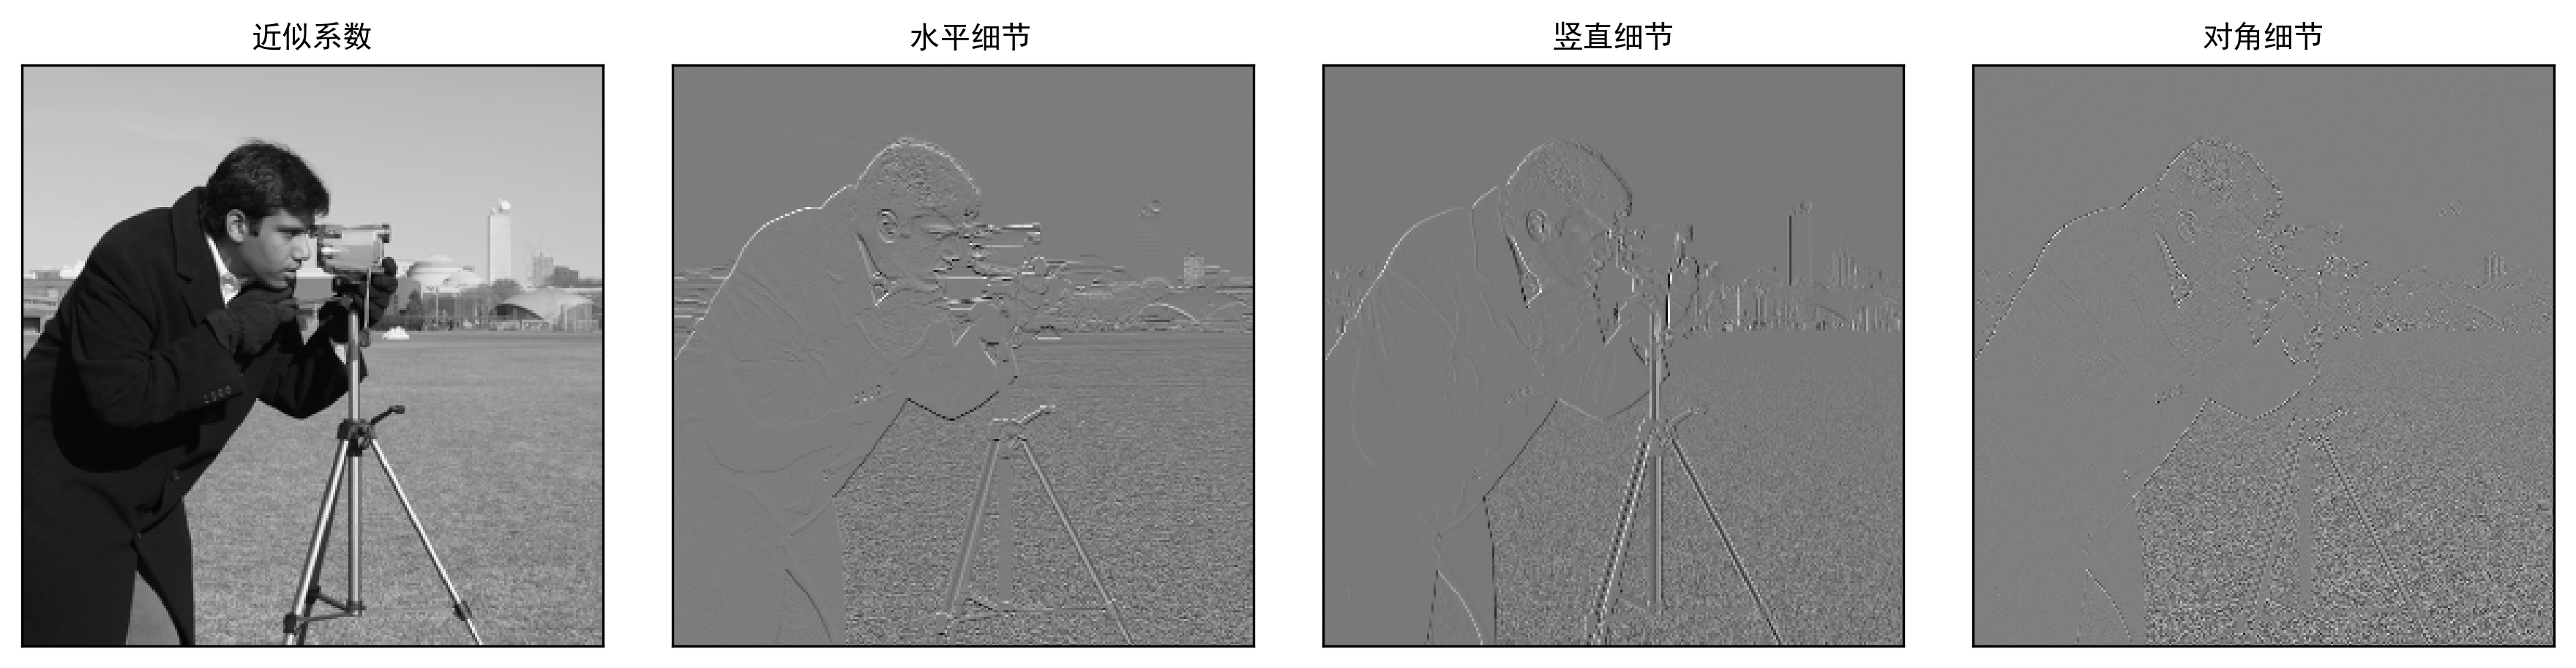

In [12]:
import matplotlib.pyplot as plt
import numpy as np

import pywt
import pywt.data
from matplotlib import rcParams
rcParams['font.sans-serif'] = ['SimHei'] 

# Load cameraman image
original = pywt.data.camera()

#2-D Discrete Wavelet transform of image, and plot approximation and details
titles = ['近似系数', ' 水平细节',
          '竖直细节', '对角细节']
coeffs2 = pywt.dwt2(original, 'bior1.3')  #离散小波变换DWT，滤波器组用的是双正交小波bior1.3
#常用的有Daubechies正交滤波器组db1,db2,db3; 
#常用的有Daubechies双正交滤波器组,bior1.3, bior2.2 (JEPG2000无损压缩),bior3.5, bior4.4(JEPG2000有损压缩)
print('离散小波滤波器组(分解低通滤波器,分解高通滤波器,重构低通滤波器,重构高通滤波器)',pywt.Wavelet('bior1.3').filter_bank)

LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation='nearest', cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

# 2.2 有向Haar框架小波一层变换

参考前面的文献[2]

自定义滤波器：https://pywavelets.readthedocs.io/en/latest/ref/wavelets.html#wavelet-object

C:\Users\LRR\AppData\Local\Temp\ipykernel_28768\3380641833.py:32: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(251), plt.imshow(image,'gray'), plt.title(f'原图',fontsize=8), plt.axis('off')


(<Axes: title={'center': '高频系数6'}>,
 Text(0.5, 1.0, '高频系数6'),
 (-0.5, 511.5, 511.5, -0.5))

<Figure size 2400x2400 with 0 Axes>

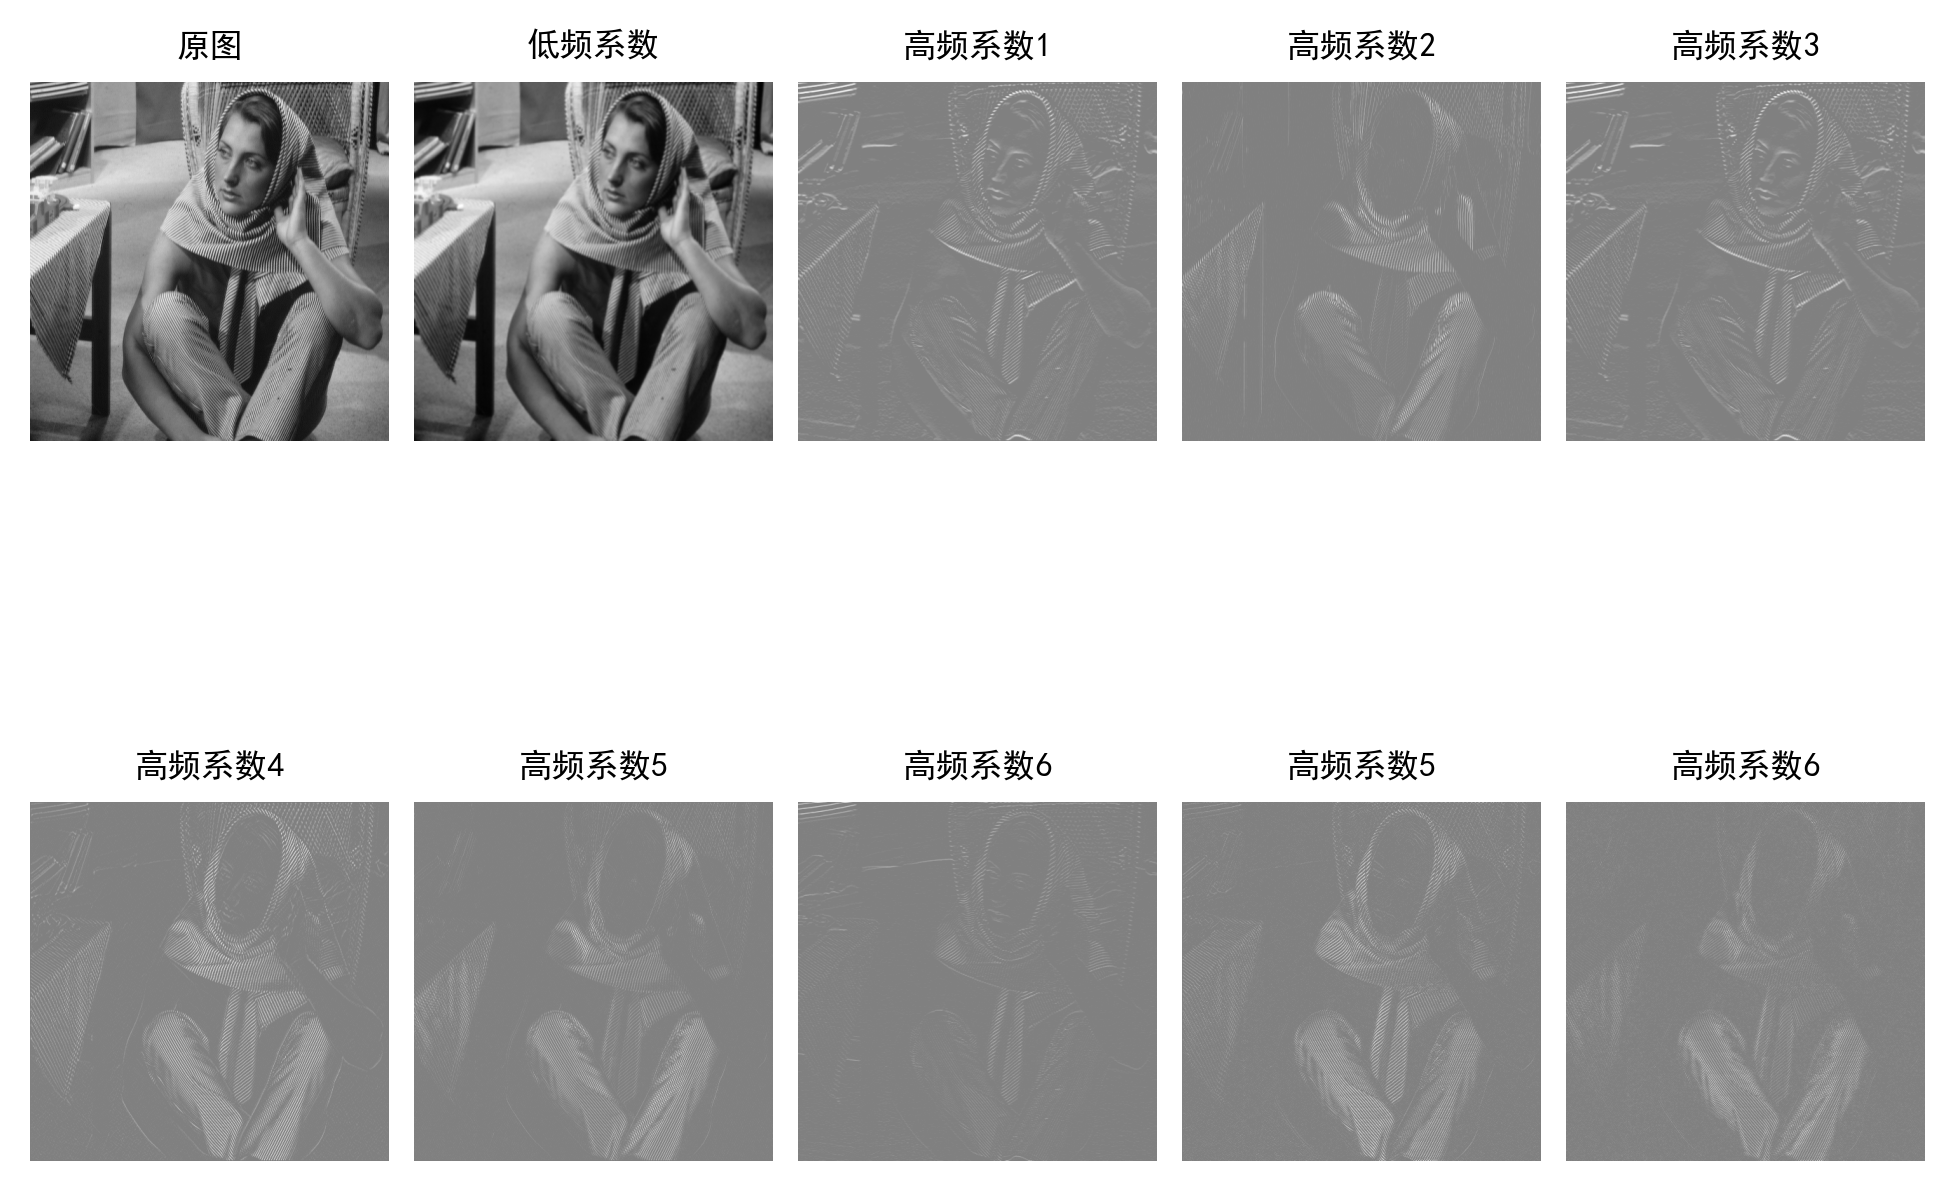

In [13]:
import cv2  
import numpy as np  
import matplotlib.pyplot as plt  
# 读取图像  
image = cv2.imread('Barbara.png', cv2.IMREAD_GRAYSCALE)   
# 定义四个卷积核  
h0 = np.array([[1.0,1.0,1.0],[1.0,1.0,1.0],[1.0,1.0,1.0]])/9  
h1 = np.array([[1.0,1.0,1.0],[0.0,0.0,0.0],[-1.0,-1.0,-1.0]])*(np.sqrt(6)/18) 
h2 = np.array([[1.0,-2.0,1.0],[1.0,-2.0,1.0],[1.0,-2.0,1.0]])*(np.sqrt(2)/18)
h3 = np.array([[1.0,1.0,1.0],[0.0,0.0,0.0],[-1.0,-1.0,-1.0]])*(np.sqrt(6)/18)
h4 = np.array([[1.0,0.0,-1.0],[0.0,0.0,0.0],[-1.0,0.0,1.0]])*(1/6)
h5 = np.array([[1.0,-2.0,1.0],[0.0,0.0,0.0],[-1.0,2.0,-1.0]])*(np.sqrt(3)/18)
h6 = np.array([[1.0,1.0,1.0],[-2.0,-2.0,-2.0],[1.0,1.0,1.0]])*(np.sqrt(2)/18)
h7 = np.array([[1.0,0.0,-1.0],[-2.0,0.0,2.0],[1.0,0.0,-1.0]])*(np.sqrt(3)/18)
h8 = np.array([[1.0,-2.0,1.0],[-2.0,4.0,-2.0],[1.0,-2.0,1.0]])*(1/18)
# 对图像进行卷积  
c0 = cv2.filter2D(image, -1, h0)  
c1 = cv2.filter2D(image, -1, h1)
c2 = cv2.filter2D(image, -1, h2)
c3 = cv2.filter2D(image, -1, h3)
c4 = cv2.filter2D(image, -1, h4)
c5 = cv2.filter2D(image, -1, h5)
c6 = cv2.filter2D(image, -1, h6)
c7 = cv2.filter2D(image, -1, h7)
c8 = cv2.filter2D(image, -1, h8)
# 显示原图像和卷积后的图像 
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi'] = 300  
fig = plt.figure(figsize=(8, 8))
plt.subplots(constrained_layout=True)
plt.subplot(251), plt.imshow(image,'gray'), plt.title(f'原图',fontsize=8), plt.axis('off') 
plt.subplot(252), plt.imshow(c0,'gray'), plt.title(f'低频系数',fontsize=8), plt.axis('off') 
plt.subplot(253), plt.imshow(c1,'gray',alpha=0.5), plt.title(f'高频系数1',fontsize=8),  plt.axis('off') 
plt.subplot(254), plt.imshow(c2,'gray',alpha=0.5), plt.title(f'高频系数2',fontsize=8),  plt.axis('off') 
plt.subplot(255), plt.imshow(c3,'gray',alpha=0.5), plt.title(f'高频系数3',fontsize=8),  plt.axis('off') 
plt.subplot(256), plt.imshow(c4,'gray',alpha=0.5), plt.title(f'高频系数4',fontsize=8),  plt.axis('off') 
plt.subplot(257), plt.imshow(c5,'gray',alpha=0.5), plt.title(f'高频系数5',fontsize=8),  plt.axis('off') 
plt.subplot(258), plt.imshow(c6,'gray',alpha=0.5), plt.title(f'高频系数6',fontsize=8),  plt.axis('off') 
plt.subplot(259), plt.imshow(c7,'gray',alpha=0.5), plt.title(f'高频系数5',fontsize=8),  plt.axis('off') 
plt.subplot(2,5,10), plt.imshow(c8,'gray',alpha=0.5), plt.title(f'高频系数6',fontsize=8),  plt.axis('off') 

# 3. Haar离散小波图像去噪

安装包: 

pip install scikit-image: https://pypi.org/project/scikit-image/

pip install opencv-python: https://pypi.org/project/opencv-python/

D:\Software\anaconda\jupyter\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


image shape = (512, 512)
lambda 0.04 alpha 0.3 beta 1
original image minus noisy image 36.153839690480815
recovered 23.02231065974981
recovered 24.603914294298093


C:\Users\LRR\AppData\Local\Temp\ipykernel_28768\3074652599.py:69: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131), plt.imshow(image_original,'gray')
C:\Users\LRR\AppData\Local\Temp\ipykernel_28768\3074652599.py:84: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 2400x2400 with 0 Axes>

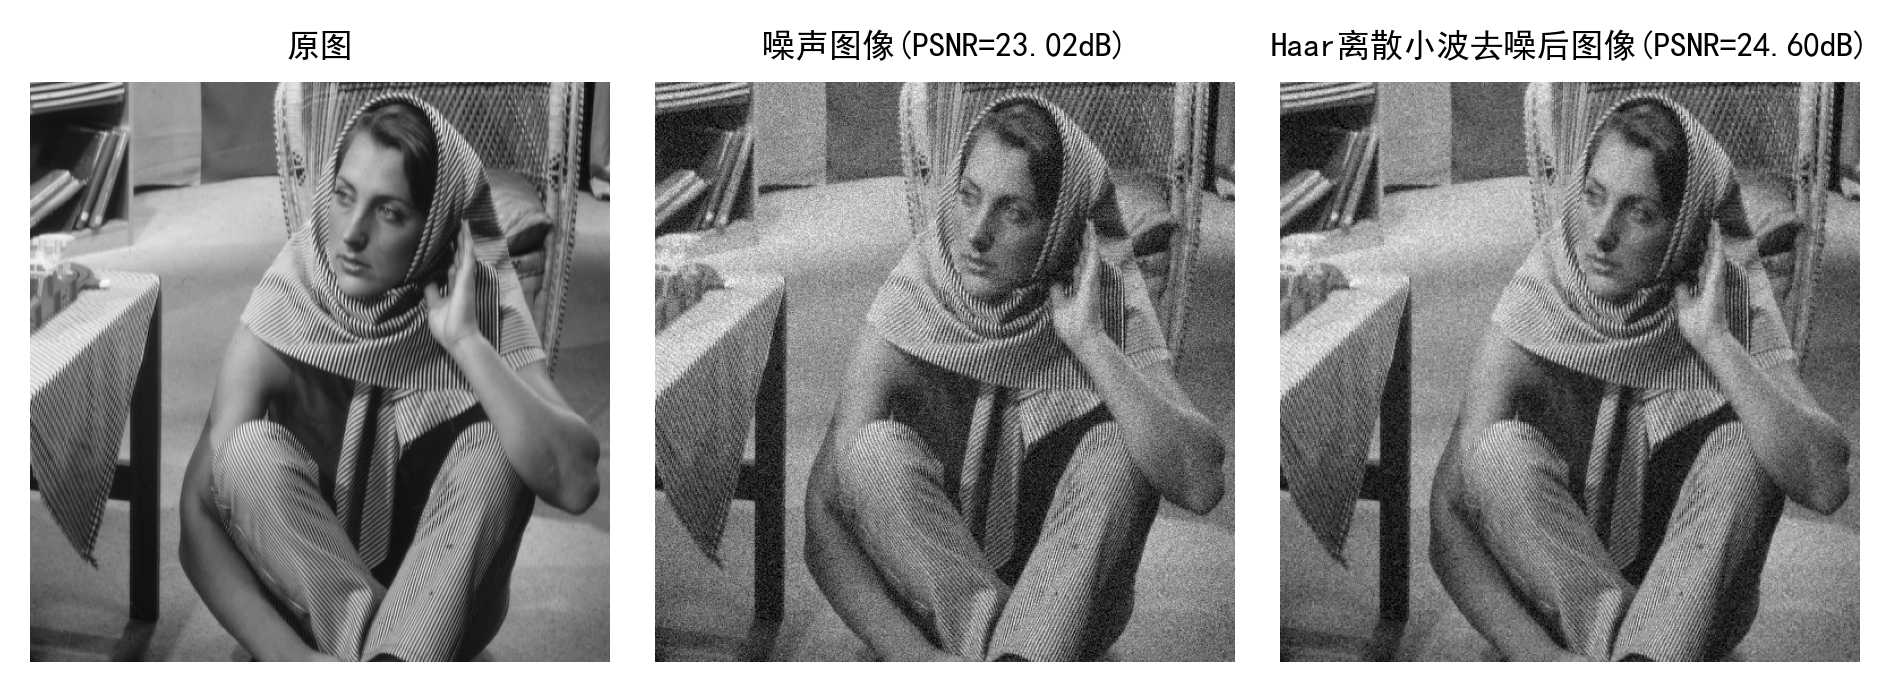

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.signal import daub
import pywt 
from skimage import io
from skimage import util
from skimage.metrics import peak_signal_noise_ratio as psnr
import cv2  


image = io.imread('Barbara.png')
image_original=np.array(image/ 255, dtype=float)
#image_original=np.array(cv2.pyrDown(cv2.pyrDown(image))/ 255, dtype=float) #如果去噪图像太大可以宽高都减半，从而缩小图片尺寸
print('image shape =', image_original.shape)
img = util.random_noise(image_original, mode='gaussian', mean=0, var=0.005)  #图像加入高斯噪声，可以设置不同噪声类型和噪声大小
v=np.random.normal(0,0.2,img.shape) 
vtidle=np.random.normal(0,0.2,img.shape)
w=np.copy(img)
wtidle=np.copy(img)

###三个参数可调
lamb=0.04
alpha=0.3
beta=1
######

t=1
rows, cols = img.shape
half_rows = rows // 2  
half_cols = cols // 2

###ADMM迭代，其中离散小波分解和重构直接通过卷积来高效计算实现，而不是通过矩阵变换来实现。
for l in range(100):
    coeffs = pywt.dwt2(w,'db1','per')  #db1=Haar 最简单的离散小波滤波器组
    cA, (cH,cV,cD) = coeffs   #LL, (HL, LH, HH) 
    

    vtidleA=np.clip(v[:half_rows, :half_cols]+beta*cA,-lamb,lamb)
    vtidleH=np.clip(v[:half_rows, half_cols:]+beta*cH,-lamb,lamb)
    vtidleV=np.clip(v[half_rows:, :half_cols]+beta*cV,-lamb,lamb)
    vtidleD=np.clip(v[half_rows:, half_cols:]+beta*cD,-lamb,lamb)
        
    vtidle[:half_rows, :half_cols]=vtidleA
    vtidle[:half_rows, half_cols:]=vtidleH
    vtidle[half_rows:, :half_cols]=vtidleV
    vtidle[half_rows:, half_cols:]=vtidleD
 
    
    tem=2*vtidleA-v[:half_rows, :half_cols],(2*vtidleH-v[:half_rows, half_cols:],2*vtidleV-v[half_rows:, :half_cols],2*vtidleD-v[half_rows:, half_cols:])

    tem_idwt= pywt.idwt2(tem, 'db1','per')
    
    wtidle=np.clip(w-alpha*tem_idwt-alpha*(w-img),0,1)  #matrix
    
    t=(1+ np.sqrt(1+4*(t**2)) )/2
       
    v=v+ ((t-1)/t+1)*(vtidle-v)
    w=w+ ((t-1)/t+1)*(wtidle-w)


plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi'] = 300  
fig = plt.figure(figsize=(8, 8))
plt.subplots(constrained_layout=True)
print('lambda',lamb,'alpha',alpha,'beta', beta)
print('original image minus noisy image', np.linalg.norm(img-image_original, 'fro'))
plt.subplot(131), plt.imshow(image_original,'gray')
plt.title(f'原图',fontsize=8)
plt.axis('off')
psnr_noise=psnr(image_original,img)
print('recovered',psnr_noise)
plt.subplot(132), plt.imshow(img,'gray')
plt.title(f'噪声图像(PSNR={psnr_noise:.2f}dB)',fontsize=8), 
plt.axis('off') 
psnr_recovered = psnr(image_original,w)
print('recovered',psnr_recovered)
plt.subplot(133), plt.imshow(w,'gray') 
plt.title(f'Haar离散小波去噪后图像(PSNR={psnr_recovered:.2f}dB)',fontsize=8),  
plt.axis('off')

# 显示所有图像  
plt.tight_layout()  
plt.savefig('Barbara_DWT.png')
plt.show()

# 练习

1. 调整实验3 Haar离散小波去噪后图像中的参数（lamb，alpha，beta）从而获得最佳的去噪图片的PSNR，此PSNR作为竞赛排名评估指标。

2. 拓展(不要求)

（1）调大实验3代码line 16中高斯噪声水平并相应的调整参数进行去噪

（2）可以更换实验3中的最为简单的Haar滤波器组为db2或者其他更加复杂一点，从而获得PSNR的显著提升。

（3）将一层的离散小波变换，更换为二层或者三层（代码需要进一步补充）,从而获得PSNR的显著提升。